In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [20]:
df = pd.read_csv("C:\Training\Phase 1\Dataset\housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [21]:
df = df.drop(df.index[1000:20639])

In [22]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
996,-121.77,37.74,25.0,494.0,81.0,254.0,85.0,9.1531,418800.0,INLAND
997,-121.80,37.70,22.0,5533.0,943.0,2474.0,910.0,4.7361,216800.0,INLAND
998,-121.80,37.69,17.0,3956.0,639.0,2222.0,662.0,5.4324,215500.0,INLAND
999,-121.82,37.69,12.0,1906.0,351.0,802.0,319.0,4.9375,227700.0,INLAND


In [23]:
df = df.dropna()

In [24]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [25]:
x = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=76)

In [28]:
svr_model = SVR()
svr_model.fit(x_train,y_train)

SVR()

In [29]:
y_pred = svr_model.predict(x_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 9090012019.1231


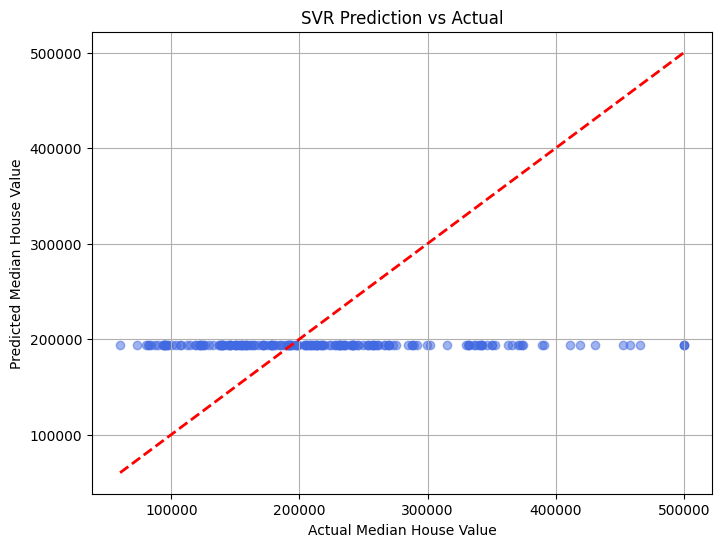

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('SVR Prediction vs Actual')
plt.grid(True)